In [5]:
#!pip install randomcolor 
import randomcolor # see: https://pypi.org/project/randomcolor/
#!pip install gif
import gif # see https://github.com/maxhumber/gif
#!pip install reverse_geocoder
import reverse_geocoder as rg # see ttps://pypi.org/project/reverse_geocoder/

import numpy as np

# plotting
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import cm, colors

# 3d
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# everything below is used to color the globe
from mpl_toolkits.basemap import Basemap
import json
import requests

# from local helpers file
from helpers import domino, getpatches, getquadrature, color_land, color_country, get_land, applyupdate

In [6]:
@gif.frame
def myplot(color,quadrature, filename,frameid=0, angle1=30,angle2=30):
    
    patches = getpatches(color,quadrature) # Get the hexagons 
    
    fig = plt.figure(figsize=plt.figaspect(1)*2,constrained_layout=False) 
    ax = fig.gca(projection='3d')
    
    # Visualize each hexagon, that is given in "color". A color is computed
    # for the center of the hexagon and then applied for the full hexagon
    ax.add_collection3d(Poly3DCollection(patches,facecolor = color,linewidth=0.1,edgecolor="k"))
        
    # Some styling
    plt.axis("off")
    l = 0.7
    ax.set_xlim([-l,l]), ax.set_ylim([-l,l]),ax.set_zlim([-l,l])
    ax.set_xticks([]), ax.set_yticks([]), ax.set_zticks([])
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    for spine in ax.spines.values():
        spine.set_visible(False)
    plt.tight_layout()
    s = "Frame {}".format(frameid)
    
    ax.annotate(s,xy=(0.05,-0.09),fontsize=20,zorder = 10000)
    ax.view_init(angle1, angle2)
    fig.savefig(filename)

In [7]:
# pick the number of cells on the globe from this list
# [92, 492, 1212, 2252, 3612, 5292, 7292, 9612, 12252, 15212]
nq = 2252
quadrature = getquadrature(nq)

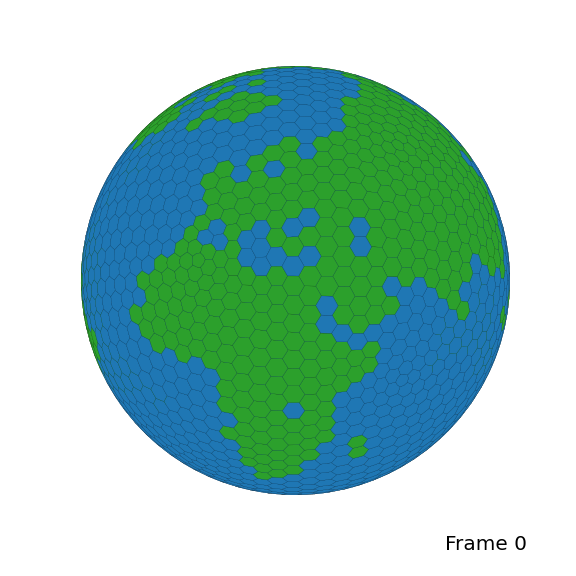

In [8]:
# plot the earth 
colors  = color_land(quadrature)
myplot(colors,quadrature,"earth.png")

Loading formatted geocoded file...


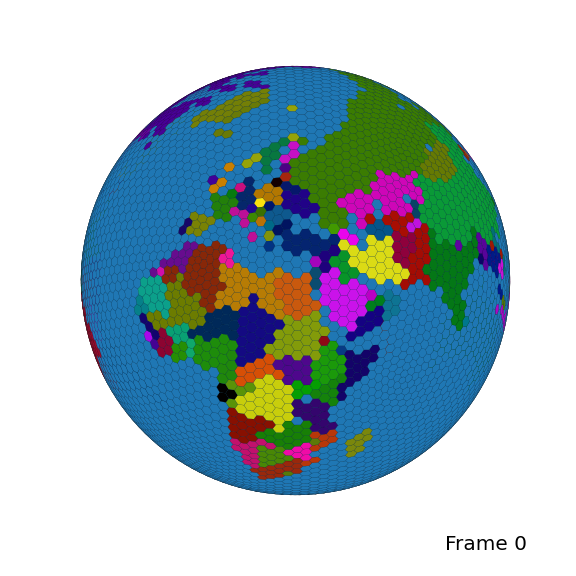

In [9]:
# higher resolution to plot countries
nq = 7292
quadrature = getquadrature(nq)
colors  = color_country(quadrature)
myplot(colors,quadrature,"earth_country.png")

In [13]:
# creating a gif
nq = 7292
quadrature = getquadrature(nq)
colors  = color_land(quadrature)

frames = []
nframes = 20 # the more, the slower 
for i,angle in enumerate(np.linspace(0,360,nframes)[:-1]):
    print(i,end=",")
    frames.append(myplot(colors,quadrature,"tmp.png",frameid = i, angle1=30,angle2=angle))

gif.save(frames,"spinning_earth.gif")

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,

In [16]:
def diffusion(c,nextc,gamma = 0.2):
    # Not really spherical diffusion
    # because I ignore the cell size,
    # but an approximation.
    return c+gamma*(np.sum(nextc) -len(nextc)*c)    

In [15]:
# pick the number of cells on the globe from this list
# [92, 492, 1212, 2252, 3612, 5292, 7292, 9612, 12252, 15212]
nq = 9612
quadrature = getquadrature(nq)

# +1 or -1 if center of hexagon is land or not 
states = np.array([0.7 if l else -1.0 for l in get_land(quadrature)])
# if there were an eleveation profile of the earth, 
# I could insert that instead of states

frames = []   # list of frames to append to 
nframes = 200 # number of frames 
frequency = 1 # frequency with which to update the states

# make camera move around the globe and up and down
angles1 = 0.2*np.degrees( np.sin(np.linspace(0,5*2*np.pi,nframes+1)[:-1]))
angles2 = np.linspace(0,3*360,nframes+1)[:-1]

# specify the update rule
updaterule = diffusion

for i,(angle1,angle2) in enumerate(zip(angles1,angles2)):
    
    # Map from states to color 
    cmap = matplotlib.cm.get_cmap('terrain') 
    colors = [cmap(s) for s in states]

    frames.append(myplot(colors,quadrature,f"PNG/{i}.png",i,angle1=angle1,angle2=angle2))
    
    # update states according to rule 
    if i%frequency == 0:
        states = applyupdate(quadrature,updaterule,states)
     
    print(i+1,end= "," if i<nframes-1 else ". Done!")
gif.save(frames, "diffusion.gif", duration = 100)

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200. Done!

In [17]:
def gameoflife(c,nextc):
    # update the cell c based upon the neighbours nextc
    # c is true => cell alive
    # c is fale => cell dead 
    
    n = len(nextc) # is mostly 6 but for some points 5 
    nalive = sum(nextc)
    if not(c) and nalive in [1,2]:
        return True
    
    if c  and nalive in [3,4,5,6]:
        return False

    # Else, nothing changed
    return c

In [18]:
# pick the number of cells on the globe from this list
# [92, 492, 1212, 2252, 3612, 5292, 7292, 9612, 12252, 15212]
nq = 5292
quadrature = getquadrature(nq)

# True or False if center of hexagon is land or not 
states = np.random.rand(nq)<0.01

frames = []   # list of frames to append to 
nframes = 100 # number of frames 
frequency = 5 # frequency with which to update the states

# make camera move around the globe and up and down
angles1 = np.degrees( np.sin(np.linspace(0,2*np.pi,nframes+1)[:-1]))
angles2 = 30+0*np.linspace(0,3*360,nframes+1)[:-1]

# specify the update rule
updaterule = gameoflife

for i,(angle1,angle2) in enumerate(zip(angles1,angles2)):
    
    # Map from states to color 
    colors = ["tab:green" if s else "k" for s in states]

    frames.append(myplot(colors,quadrature,f"PNG/{i}.png",i,angle1=angle1,angle2=angle2))
    
    # update states according to rule 
    if i%frequency == 0:
        states = applyupdate(quadrature,updaterule,states)
     
    print(i+1,end= "," if i<nframes-1 else ". Done!")
gif.save(frames, "gol.gif", duration = 100)

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100. Done!